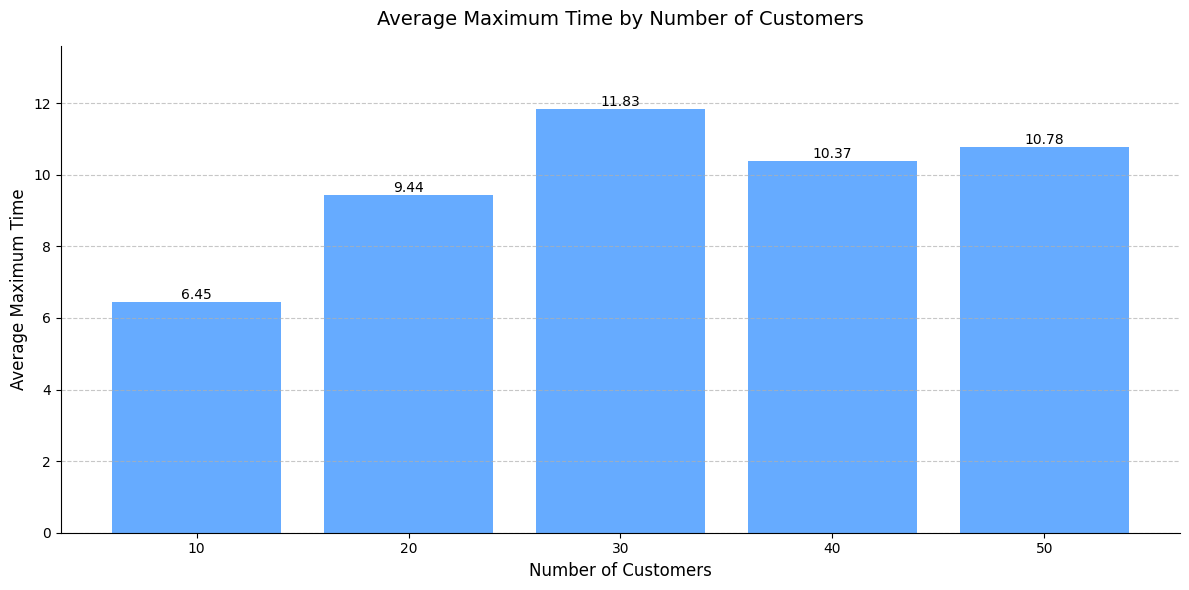

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../results/greedy_summary_equal_proprtitonal_loads_20241105_174206.csv')

# Group by number of customers and calculate mean max_time
avg_times = df.groupby('num_customers')['max_time'].mean().reset_index()

# Create the plot with specific dimensions
plt.figure(figsize=(12, 6))

# Create bars
bars = plt.bar(avg_times['num_customers'], avg_times['max_time'], 
               width=8, color='#4096ff', alpha=0.8)

# Customize the plot
plt.title('Average Maximum Time by Number of Customers', fontsize=14, pad=15)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Average Maximum Time', fontsize=12)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Customize axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Set y-axis limits
max_time = avg_times['max_time'].max()
plt.ylim(0, max_time * 1.15)  # Add 15% padding on top

# Add hover effect (optional, needs to be run in a Jupyter notebook)
def hover(event):
    if event.inaxes == plt.gca():
        for bar in bars:
            contains, _ = bar.contains(event)
            bar.set_alpha(0.5 if contains else 0.8)
        plt.draw()

plt.gcf().canvas.mpl_connect('motion_notify_event', hover)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

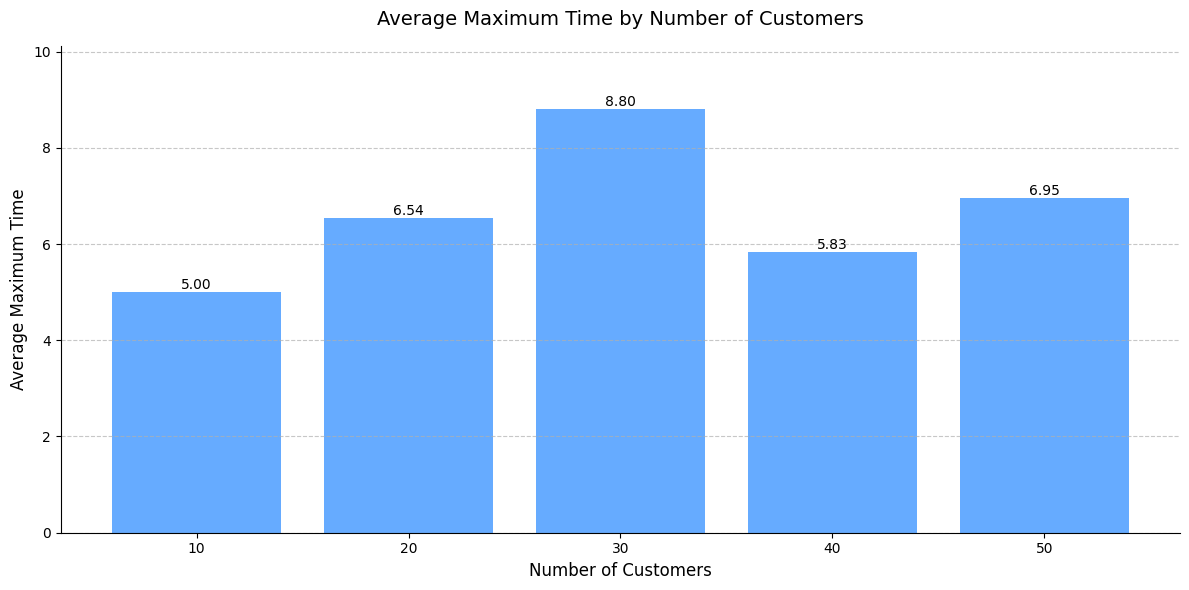

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../results/SA_summary_ew_20241105_174629.csv')

# Group by number of customers and calculate mean max_time
avg_times = df.groupby('num_customers')['max_time'].mean().reset_index()

# Create the plot with specific dimensions
plt.figure(figsize=(12, 6))

# Create bars
bars = plt.bar(avg_times['num_customers'], avg_times['max_time'], 
               width=8, color='#4096ff', alpha=0.8)

# Customize the plot
plt.title('Average Maximum Time by Number of Customers', fontsize=14, pad=15)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Average Maximum Time', fontsize=12)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Customize axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Set y-axis limits
max_time = avg_times['max_time'].max()
plt.ylim(0, max_time * 1.15)  # Add 15% padding on top

# Add hover effect (optional, needs to be run in a Jupyter notebook)
def hover(event):
    if event.inaxes == plt.gca():
        for bar in bars:
            contains, _ = bar.contains(event)
            bar.set_alpha(0.5 if contains else 0.8)
        plt.draw()

plt.gcf().canvas.mpl_connect('motion_notify_event', hover)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Comparison of Different Deviation Calculations:

Num Customers | Original % | Avg-based % | Max-based % | Log-based %
-----------------------------------------------------------------
          10 |      22.4 |       25.2 |       22.4 |       25.3
          20 |      30.7 |       36.3 |       30.7 |       36.7
          30 |      25.6 |       29.4 |       25.6 |       29.6
          40 |      43.8 |       56.1 |       43.8 |       57.7
          50 |      35.6 |       43.3 |       35.6 |       44.0


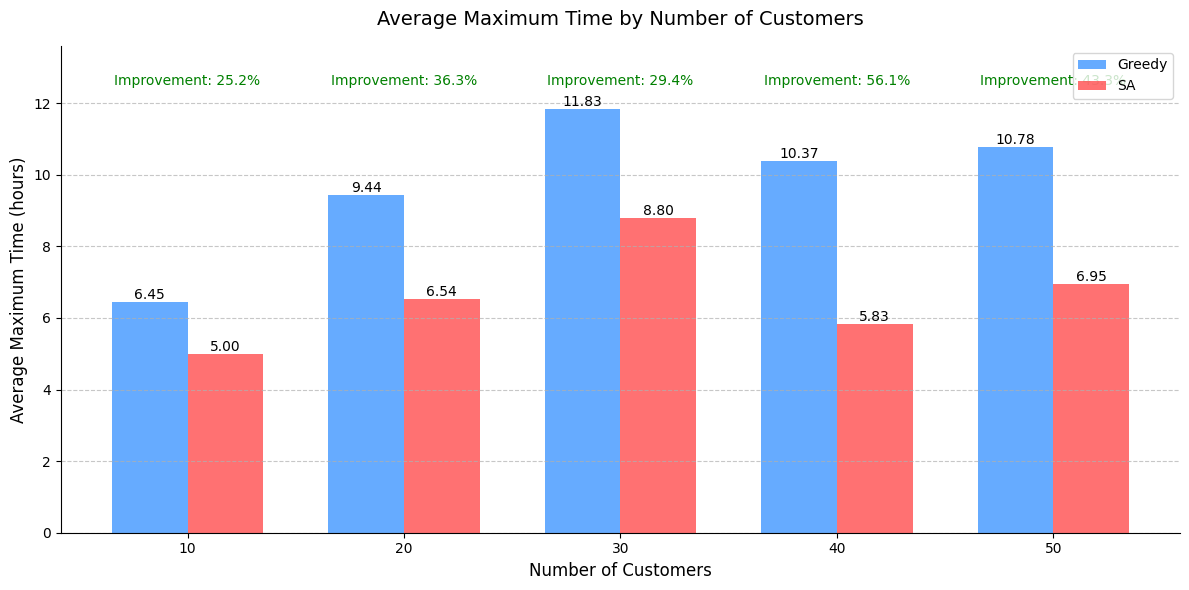


Overall Statistics:

Average Improvement:
Original Method: 31.6%
Average-based Method: 38.1%
Maximum-based Method: 31.6%
Log-based Method: 38.7%


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
greedy_df = pd.read_csv('../results/greedy_summary_equal_proprtitonal_loads_20241105_174206.csv')
sa_df = pd.read_csv('../results/SA_summary_ew_20241105_174629.csv')

# Group by number of customers and calculate mean max_time
greedy_avg = greedy_df.groupby('num_customers')['max_time'].mean().reset_index()
sa_avg = sa_df.groupby('num_customers')['max_time'].mean().reset_index()

# Ensure num_customers is integer
greedy_avg['num_customers'] = greedy_avg['num_customers'].astype(int)
sa_avg['num_customers'] = sa_avg['num_customers'].astype(int)

# Calculate percentage difference using different methods
comparison_data = pd.merge(greedy_avg, sa_avg, on='num_customers', suffixes=('_greedy', '_sa'))

# Method 1: Relative to average of both methods
comparison_data['deviation_avg'] = ((comparison_data['max_time_greedy'] - comparison_data['max_time_sa']) / 
                                  ((comparison_data['max_time_greedy'] + comparison_data['max_time_sa'])/2)) * 100

# Method 2: Relative to maximum value
comparison_data['deviation_max'] = ((comparison_data['max_time_greedy'] - comparison_data['max_time_sa']) / 
                                  comparison_data[['max_time_greedy', 'max_time_sa']].max(axis=1)) * 100

# Method 3: Log-based difference
comparison_data['deviation_log'] = (np.log(comparison_data['max_time_greedy']) - 
                                  np.log(comparison_data['max_time_sa'])) * 100

# Print comparison of different deviation calculations
print("\nComparison of Different Deviation Calculations:")
print("\nNum Customers | Original % | Avg-based % | Max-based % | Log-based %")
print("-" * 65)
for _, row in comparison_data.iterrows():
    original = ((row['max_time_greedy'] - row['max_time_sa']) / row['max_time_greedy']) * 100
    print(f"{int(row['num_customers']):12} | {original:9.1f} | {row['deviation_avg']:10.1f} | {row['deviation_max']:10.1f} | {row['deviation_log']:10.1f}")

# Create the visualization with avg-based metric
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(comparison_data['num_customers']))

# Create bars
greedy_bars = plt.bar(x - width/2, comparison_data['max_time_greedy'], 
                     width, label='Greedy', color='#4096ff', alpha=0.8)
sa_bars = plt.bar(x + width/2, comparison_data['max_time_sa'], 
                  width, label='SA', color='#ff4d4f', alpha=0.8)

plt.title('Average Maximum Time by Number of Customers', fontsize=14, pad=15)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Average Maximum Time (hours)', fontsize=12)

# Set x-axis ticks
plt.xticks(x, comparison_data['num_customers'].astype(int))
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

# Add value labels
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')

add_value_labels(greedy_bars)
add_value_labels(sa_bars)

# Set y-axis limits
max_time = max(comparison_data['max_time_greedy'].max(), 
               comparison_data['max_time_sa'].max())
plt.ylim(0, max_time * 1.15)

# Add improvement percentages using avg-based method
for i, row in comparison_data.iterrows():
    plt.text(x[i], max_time * 1.05,
             f'Improvement: {row["deviation_avg"]:.1f}%',
             ha='center', va='bottom',
             color='green' if row["deviation_avg"] > 0 else 'red')

plt.tight_layout()
plt.show()

# Print overall statistics for each method
print("\nOverall Statistics:")
print(f"\nAverage Improvement:")
print(f"Original Method: {((comparison_data['max_time_greedy'] - comparison_data['max_time_sa']) / comparison_data['max_time_greedy']).mean() * 100:.1f}%")
print(f"Average-based Method: {comparison_data['deviation_avg'].mean():.1f}%")
print(f"Maximum-based Method: {comparison_data['deviation_max'].mean():.1f}%")
print(f"Log-based Method: {comparison_data['deviation_log'].mean():.1f}%")